# COGS 108 - Final Project (change this to your project's title)

# Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [  ] YES - make available
* [  ] NO - keep private

# Names

- Marina Hu
- Allison Huang
- Samuel Lee
- Audrey Liang
- Lilian Xia 

# Abstract

Please write one to four paragraphs that describe a very brief overview of why you did this, how you did, and the major findings and conclusions.

# Research Question

We want to figure out the following question for this project: 

- Are we able to predict the rise or fall of crime rates based on the rise or fall of COVID-19 rates and effects?

To do so, here are some of the variables we will be looking at (These are all on a county by county basis in California):
- Violent crime rates from around the years March 2020- March 2022
- Hospitalization rates
- Vaccination Rates
- COVID cases

## Background and Prior Work

The COVID-19 pandemic has had numerous effects in many aspects of life, from social connections to physical and mental health. Among its less apparent interpersonal and political impacts are those on crime rates. Existing research and analyses reveal a comprehensive picture: while the pandemic has led to substantial shifts in crime rates compared to pre-pandemic times, the direction and scale of these changes vary depending on the type of crime. Our research aims to investigate these dynamics, particularly focusing on the trends in violent crime rates in correlation with various COVID-19 data in California. 

The Centers for Disease Control and Prevention (CDC) and FBI both reported a striking 30 percent increase in the number of homicides in the U.S. from 2019 to 2020, marking the largest single-year increase on record.<a name="cite_ref-2"></a>[<sup>2</sup>](#cite_note-2) According to a study by the Council on Criminal Justice (CCJ), this surge likely stemmed from a combination of factors, including the pandemic and social unrest.<a name="cite_ref-3"></a>[<sup>3</sup>](#cite_note-3) This study also highlights increases in aggravated and gun assaults and motor vehicle thefts, juxtaposed with declines in residential and non-residential burglaries, larcenies, and drug offenses. Recent data reveals that there was a significant 2% decline in violent crime in the U.S., approaching pre-pandemic rates.<a name="cite_ref-4"></a>[<sup>4</sup>](#cite_note-4) However, these studies note that it is unclear if these fluctuations in crime rate can be attributed to the pandemic. In our project, we aim to analyze COVID-19 data to see if there are significant correlations that can potentially help explain and predict these trends.

More specifically, we focus on analyzing data in California as findings reveal a notable widening of the gap between the state’s violent crime rates and the national average during the pandemic.<a name="cite_ref-1"></a>[<sup>1</sup>](#cite_note-1) This disparity increased significantly from 15% in 2019 to 31% in 2022. Surprisingly, this surge is not correlated with the national increase in homicide rates but rather due to a rise in aggravated assaults within the state. Moreover, the Public Policy Institute of California indicates that the violent crime rates across counties varies, with 36 out of 58 witnessing a surge in 2022, 13 of which increasing by 20% or more. With this research, we’re interested in further analyzing violent crime rates in California to identify potential correlations with COVID-19. Are the shifts in crime rate truly attributed to the pandemic or merely an overlap in timing? Moreover, are these correlations consistent across the state or confined to specific counties? To answer these questions, we look at three major indicators of COVID-19: hospitalization rates, overall cases, and vaccination rates. Going a step further, we want to see if we can potentially predict the rise or fall of violent crime rates given the upward or downward trends of the pandemic.

1. <a name="cite_note-1"></a> Lofstrom, M., & Martin, B. (2023, October). Crime Trends in California. Public Policy Institute of California. https://www.ppic.org/publication/crime-trends-in-california/ 
2. <a name="cite_note-2"></a> Northeastern University Public Affairs. (2023, January 27). How COVID-19 Changed Crime in the U.S.. https://publicaffairs.northeastern.edu/articles/us-crime-rate-during-pandemic/ 
3. <a name="cite_note-3"></a> Rosenfeld, R., & Lopez Jr., E. (2021, May 21). Pandemic, Social Unrest, And Crime in U.S. Cities: March 2021 Update. Council on Criminal Justice. https://counciloncj.org/impact-report-covid-19-and-crime/ 
4. <a name="cite_note-4"></a> Salter, J. (2023, October). Violent Crime Decreases to Pre-Pandemic Levels: FBI Report. TIME USA. https://time.com/6324381/violent-crime-decreases-pre-pandemic-levels-fbi/ 


# Hypothesis


We hypothesize that COVID-19's effect on the public's health will be reflected in the violent crime rates. We believe there is a relationship between counties more heavily impacted by COVID-19 and rising serious crime rates. 

# Data

## Data overview

For each dataset include the following information
- Dataset #1
  - Dataset Name: California Crime Rates by County
  - Link to the dataset: https://openjustice.doj.ca.gov/data, under Crime and Clearances Monthly CSV
  - Number of observations: 350
  - Number of variables: 12
- Dataset #2 
  - Dataset Name: COVID-19 Time-Series Metrics by County and State
  - Link to the dataset: https://catalog.data.gov/dataset/covid-19-time-series-metrics-by-county-and-state-e7757
  - Number of observations: 86559
  - Number of variables: 12
- Dataset #3 
  - Dataset Name: Statewide Covid-19 Hospital County Data
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-hospital-data/resource/e34f966b-39dc-4f86-8087-2f9b327f60f3
  - Number of observations: 79554
  - Number of variables: 10
- Dataset #4
  - Dataset Name: Covid-19 Vaccines Counts by County
  - Link to the dataset: https://data.ca.gov/dataset/covid-19-vaccine-progress-dashboard-data/resource/317f8cd8-7225-4b7e-99d1-6ea441043a51
  - Number of observations: 9195
  - Number of variables: 10 

## California Crime Rates by County

In [3]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# setting
pd.options.display.max_rows = 30
pd.options.display.max_columns = 20

In [4]:
counties = ['Los Angeles County' , 'San Diego County' , 'Orange County' , 'Riverside County' , 'San Bernardino County' , 'Santa Clara County', 'Alameda County', 'Sacramento County', 'Contra Costa County', 'Fresno County', 'Kern County', 'Ventura County',  'San Joaquin County', 'San Francisco County', 'San Mateo County']
obj_cols = ['Violent_sum','Homicide_sum','ForRape_sum','Robbery_sum','AggAssault_sum','Property_sum','Burglary_sum','VehicleTheft_sum','LTtotal_sum']
crime_df = pd.read_csv('CrimeData.csv', low_memory= False)

#Replacing all empty strings with 0 to get rid of converting empty strings to ints
crime_df[obj_cols] = crime_df[obj_cols].replace(" ", '0').astype(int)

crime_df = crime_df[crime_df['County'].isin(counties)].drop('NCICCode', axis=1)
crime_df['County'] = crime_df['County'].str.replace(' County', '')

#Locate just years 2020-2022 and just from March 2020 - March 2022
crime_df = crime_df[crime_df['Year'] > 2019].iloc[2:14599,:8]
crime_df['year_month'] = crime_df['Year'].astype(str) + '-' + crime_df['Month'].astype(str).apply(lambda x: x.zfill(2))
crime_df = crime_df[crime_df['year_month'].between('2020-07', '2022-03')]
crime_df = crime_df.drop(['Month', 'Year'], axis= 1)

# Sum up from each individual city
crime_df = crime_df.groupby(['County', 'year_month'], group_keys= True).sum().reset_index()
crime_df = crime_df.rename(columns={'County':'county'})

crime_df

,county,year_month,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum
0,Alameda,2020-07,810,13,51,303,443
1,Alameda,2020-08,788,18,67,279,424
2,Alameda,2020-09,772,19,67,262,424
3,Alameda,2020-10,840,14,62,343,421
4,Alameda,2020-11,779,13,45,378,343
...,...,...,...,...,...,...,...
307,Ventura,2021-08,141,3,16,24,98
308,Ventura,2021-09,137,1,16,24,96
309,Ventura,2021-10,191,0,30,44,117
310,Ventura,2021-11,149,1,15,53,80


## COVID-19 Cases by County Dataset

- Description: 
    - The dataset below is from to California Department of Public Health and contains data about the number of COVID-19 cases, deaths, and positive tests across all the counties in California between 02/01/2020 to 12/19/2023. 
- Variables and their datatypes:
    - The main varibales that we are interested in analyzing are 'cumulative_cases' (`float64` type), 'cumulative_deaths' (`float64` type), 'cumulative_total_tests' (`int64` type), 'cumulative_positive_tests' (`int64` type). 'date' and 'area' are included as well which are of `object` type, and for area, which in this dataset is synonymous with county, is limited to the top 15 most populated counties in California, and this has been consistent amongst all our dataset. 'population' (also `float64` type) is kept as a potential important and useful factor for analysis in the future. 
- Concepts:
    - In general, these variables reveal the total most updated number of cases, deaths, total tests, and positive tests in these counties on each date of 02/01/2020 to 12/19/2023. This will help us further determine further if a county was more affected by COVID-19 than other counties, along with our other factors too for the COVID-19 part of our research question
- Wrangling/Cleaning/Preprocessing the dataset:
    - To begin our initial wrangling, we plan to first just pull out all the data for our variables, counties, and dates of interest (as shown below) and thus condensing the dataset down to 11415 rows × 7 columns. Because we have multiple datasets for COVID-19, we plan to do the same process for all the COVID-19 dataset, eventually combining all these into one dataframe to simplify and increase the efficiency of future analysis.

In [5]:
# counties and interested columns to analyze further into
counties = ['Los Angeles' , 'San Diego' , 'Orange' , 'Riverside' , 'San Bernardino' , 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Ventura',  'San Joaquin', 'San Francisco', 'San Mateo']
# note: interested_cols = ['area'	,'year_month'	,'population'	,'cases',	'deaths'	,'total_tests'	,'positive_tests']

# loading/reading the initial dataframe
covid_cases_df = pd.read_csv('COVID19_Cases_Test.csv')
covid_cases_df = covid_cases_df[covid_cases_df['area'].isin(counties)].drop('area_type', axis=1)
covid_cases_df = covid_cases_df.dropna()

covid_cases_df['date'] = pd.to_datetime(covid_cases_df['date'])
covid_cases_df = covid_cases_df[covid_cases_df['date'].between('2020-07-01', '2022-03-31')] 
covid_cases_df['year_month'] = covid_cases_df['date'].dt.year.astype(str) + '-' + covid_cases_df['date'].dt.month.astype(str).apply(lambda x: x.zfill(2))
covid_cases_df = covid_cases_df.drop(['cumulative_cases', 'cumulative_deaths', 'cumulative_total_tests', 'cumulative_positive_tests','date'], axis=1)

covid_cases_df = covid_cases_df.groupby(['area', 'year_month', 'population'], group_keys= True).mean().reset_index()

covid_cases_df

,area,year_month,population,cases,deaths,total_tests,positive_tests
0,Alameda,2020-07,1685886.0,211.838710,1.870968,4465.709677,255.870968
1,Alameda,2020-08,1685886.0,172.903226,3.290323,4320.387097,214.387097
2,Alameda,2020-09,1685886.0,86.233333,2.566667,4892.500000,113.133333
3,Alameda,2020-10,1685886.0,85.000000,0.967742,6276.741935,98.806452
4,Alameda,2020-11,1685886.0,282.066667,1.300000,8347.266667,281.433333
...,...,...,...,...,...,...,...
310,Ventura,2021-11,852747.0,81.666667,0.566667,4546.033333,104.700000
311,Ventura,2021-12,852747.0,538.612903,1.064516,5813.806452,626.935484
312,Ventura,2022-01,852747.0,1573.516129,4.419355,9629.354839,2122.354839
313,Ventura,2022-02,852747.0,201.178571,3.892857,4832.142857,318.464286


In [6]:
# what the datatypes are for each of the varaibles that we are interested in analyzing 
covid_cases_df.dtypes

area               object
year_month         object
population        float64
cases             float64
deaths            float64
total_tests       float64
positive_tests    float64
dtype: object

In [7]:
# size of the dataframe after filtereing for interested variables, counties, and dates
covid_cases_df.shape

(315, 7)

In [8]:
# getting an overview of and checking missingness of the dataset
covid_cases_df.isnull().sum()

area              0
year_month        0
population        0
cases             0
deaths            0
total_tests       0
positive_tests    0
dtype: int64

In [10]:
# calculating the proportions for each of the variables

var_columns = ['cases', 'deaths',
       'total_tests', 'positive_tests']


monthly_average_prop = covid_cases_df.copy()

for col in var_columns:
    proportion = monthly_average_prop[col]/monthly_average_prop['population']
    
    # Determine the position to insert the new column
    existing_column_position = monthly_average_prop.columns.get_loc(col)  # Get the position of 'existing_column'

    # Insert the new column after 'existing_column'
    monthly_average_prop.insert(existing_column_position + 1, ('proportion of ' + col), proportion)
    

monthly_average_prop

,area,year_month,population,cases,proportion of cases,deaths,proportion of deaths,total_tests,proportion of total_tests,positive_tests,proportion of positive_tests
0,Alameda,2020-07,1685886.0,211.838710,0.000126,1.870968,1.109783e-06,4465.709677,0.002649,255.870968,0.000152
1,Alameda,2020-08,1685886.0,172.903226,0.000103,3.290323,1.951687e-06,4320.387097,0.002563,214.387097,0.000127
2,Alameda,2020-09,1685886.0,86.233333,0.000051,2.566667,1.522444e-06,4892.500000,0.002902,113.133333,0.000067
3,Alameda,2020-10,1685886.0,85.000000,0.000050,0.967742,5.740257e-07,6276.741935,0.003723,98.806452,0.000059
4,Alameda,2020-11,1685886.0,282.066667,0.000167,1.300000,7.711079e-07,8347.266667,0.004951,281.433333,0.000167
...,...,...,...,...,...,...,...,...,...,...,...
310,Ventura,2021-11,852747.0,81.666667,0.000096,0.566667,6.645191e-07,4546.033333,0.005331,104.700000,0.000123
311,Ventura,2021-12,852747.0,538.612903,0.000632,1.064516,1.248338e-06,5813.806452,0.006818,626.935484,0.000735
312,Ventura,2022-01,852747.0,1573.516129,0.001845,4.419355,5.182492e-06,9629.354839,0.011292,2122.354839,0.002489
313,Ventura,2022-02,852747.0,201.178571,0.000236,3.892857,4.565079e-06,4832.142857,0.005667,318.464286,0.000373


In [11]:
monthly_average_prop.isnull().sum()

area                            0
year_month                      0
population                      0
cases                           0
proportion of cases             0
deaths                          0
proportion of deaths            0
total_tests                     0
proportion of total_tests       0
positive_tests                  0
proportion of positive_tests    0
dtype: int64

## COVID-19 Hospitalization by County Dataset
- Description: 
    - The dataset below is from the California Department of Public Health and contains data about hostipitalization related to COVID across all the counties in California between 2020-03-27 to 2024-02-17. 
- Variables and their datatypes:
    - **todays_date** (pd.timestamp): The date of the observation
    - **hospitalized_covid_confirmed_patients** (float64): The number of patients hospitalized in an inpatient bed who have laboratory-confirmed COVID.
    - **hospitalized_suspected_covid_patients** (float64): The number of patients hospitalized in an inpatient bed without a laboratory-confirmed COVID diagnosis who have signs and symptoms compatible with COVID.
    - **hospitalized_covid_patients** (float64): The number of patients currently hospitalized in an inpatient bed who have suspected or confirmed COVID.
    - **all_hospital_beds** (float64): The total number of beds in the facility, including all surge beds, inpatient and outpatient post-surgical beds, labor and delivery unit beds, and observation beds.
    - **icu_covid_confirmed_patients** (float64): The number of laboratory-confirmed positive COVID patients that are in the ICU at the hospital.
    - **icu_suspected_covid_patients** (float64): The number of symptomatic patients, with tests for COVID pending laboratory confirmation, that are in the ICU at the hospital.
    - **icu_available_beds** (float64): The number of ICU beds available at the hospital.
- Concepts:
    - This dataset can give us the general condition of COVID hospitalization, which can help us to estimate the impact of COVID on medical capacity.
- Wrangling/Cleaning/Preprocessing the dataset:
    - We first removed "_id" column because it is the same as the index, and then we converted "todays_date" into pd.Timestamp datatype for us to select the time range we want. Then, we keeped the data in the top 15 populated counties.

In [12]:
hospital_df = pd.read_csv('covid19_hospitalization.csv')

# drop id column
hospital_df = hospital_df.drop('_id', axis=1)

# change the date column to pd.datetime
hospital_df["todays_date"] = pd.to_datetime(hospital_df["todays_date"])

# select rows between march 2020 and march 2022
hospital_df = hospital_df[hospital_df['todays_date'].between('2020-07-01', '2022-03-31')]

# select rows with the following counties
counties_2 = [county.replace(" County", "") for county in counties]
hospital_df = hospital_df[hospital_df['county'].isin(counties_2)].reset_index(drop=True)

hospital_df = hospital_df[['county', 'todays_date', 'hospitalized_covid_patients', 'all_hospital_beds', 'icu_covid_confirmed_patients', 'icu_available_beds']]
hospital_df['year_month'] = hospital_df['todays_date'].dt.to_period('M').astype(str)
hospital_df = hospital_df.drop(['todays_date'], axis=1).groupby(['county', 'year_month']).sum().round(2).reset_index()

hospital_df.head()

,county,year_month,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_available_beds
0,Alameda,2020-07,6742.0,84000.0,1631.0,3701.0
1,Alameda,2020-08,7234.0,74264.0,1874.0,2764.0
2,Alameda,2020-09,4667.0,71856.0,1046.0,3348.0
3,Alameda,2020-10,3150.0,74370.0,599.0,3701.0
4,Alameda,2020-11,4137.0,74421.0,769.0,3139.0


In [13]:
# Proportion of missingness in each column
hospital_df.isnull().sum() / len(hospital_df)

county                          0.0
year_month                      0.0
hospitalized_covid_patients     0.0
all_hospital_beds               0.0
icu_covid_confirmed_patients    0.0
icu_available_beds              0.0
dtype: float64

## Covid-19 Vaccines Counts by County

In [14]:
vaccine_df = pd.read_csv('covid19vaccinesbycounty.csv')

# top 15 counties in CA by population
counties = ['Los Angeles' , 'San Diego' , 'Orange' , 'Riverside' , 'San Bernardino' , 'Santa Clara', 'Alameda', 'Sacramento', 'Contra Costa', 'Fresno', 'Kern', 'Ventura',  'San Joaquin', 'San Francisco', 'San Mateo']

# inclule only the 15 counties in df
vaccine_df = vaccine_df[vaccine_df['county'].isin(counties)]
vaccine_df['administered_date'] = pd.to_datetime(vaccine_df['administered_date'])

# include the administered_date from March 2020 - March 2022
vaccine_df = vaccine_df[vaccine_df['administered_date'].between('2020-07-01', '2022-03-31')].reset_index(drop=True)

# only keeping the informative columns 
vaccine_df = vaccine_df[['county', 'administered_date', 'fully_vaccinated', 'cumulative_fully_vaccinated']]

# split the adminstered_date into year and month for merging the data later on
vaccine_df['year_month'] = vaccine_df['administered_date'].dt.to_period('M').astype(str)

# rearrange the information
vaccine_df = vaccine_df.groupby(['county', 'year_month']).agg({"fully_vaccinated": "sum", "cumulative_fully_vaccinated":"last"}).reset_index()
vaccine_df

,county,year_month,fully_vaccinated,cumulative_fully_vaccinated
0,Alameda,2020-07,0,0
1,Alameda,2020-08,2,2
2,Alameda,2020-09,38,40
3,Alameda,2020-10,6,46
4,Alameda,2020-11,6,52
...,...,...,...,...
310,Ventura,2021-11,12315,566698
311,Ventura,2021-12,18248,584946
312,Ventura,2022-01,12934,597880
313,Ventura,2022-02,9360,607240


### Merge all datasets into one:

In [16]:
data = pd.merge(covid_cases_df, hospital_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
# data = pd.merge(data, vaccine_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
data = pd.merge(data, crime_df, how='inner', left_on=['area', 'year_month'], right_on=['county', 'year_month'])
data = data.drop(['county_x', 'county_y'], axis=1)
data = data.rename(columns={'area':'county'})

data['violent_crime_proportion'] = (data['Violent_sum'] / data['population'])

data = data.sort_values(by = ['county', 'year_month'])
summed =  ['cases','deaths', 'positive_tests', 'hospitalized_covid_patients']

data['percent_change_covid'] = data[summed].sum(axis = 1).div(4, axis = 0)
data['percent_change_covid'] = data.groupby('county')['percent_change_covid'].pct_change()

data['percent_change_crime'] = data.groupby('county')['Violent_sum'].pct_change()
data = data.dropna()

data

,county,year_month,population,cases,deaths,total_tests,positive_tests,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_available_beds,Violent_sum,Homicide_sum,ForRape_sum,Robbery_sum,AggAssault_sum,violent_crime_proportion,percent_change_covid,percent_change_crime
1,Alameda,2020-08,1685886.0,172.903226,3.290323,4320.387097,214.387097,7234.0,74264.0,1874.0,2764.0,788,18,67,279,424,0.000467,0.057269,-0.027160
2,Alameda,2020-09,1685886.0,86.233333,2.566667,4892.500000,113.133333,4667.0,71856.0,1046.0,3348.0,772,19,67,262,424,0.000458,-0.361416,-0.020305
3,Alameda,2020-10,1685886.0,85.000000,0.967742,6276.741935,98.806452,3150.0,74370.0,599.0,3701.0,840,14,62,343,421,0.000498,-0.315091,0.088083
4,Alameda,2020-11,1685886.0,282.066667,1.300000,8347.266667,281.433333,4137.0,74421.0,769.0,3139.0,779,13,45,378,343,0.000462,0.409931,-0.072619
5,Alameda,2020-12,1685886.0,765.645161,7.096774,11490.322581,858.064516,11381.0,78682.0,2806.0,2398.0,848,8,46,442,352,0.000503,1.767410,0.088575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,Ventura,2021-08,852747.0,212.032258,1.806452,4116.451613,260.838710,4001.0,36063.0,870.0,1102.0,141,3,16,24,98,0.000165,2.017398,-0.250000
308,Ventura,2021-09,852747.0,133.833333,1.866667,5382.066667,176.866667,3433.0,35261.0,870.0,905.0,137,1,16,24,96,0.000161,-0.163129,-0.028369
309,Ventura,2021-10,852747.0,79.451613,0.516129,4699.096774,101.870968,1780.0,35778.0,372.0,1015.0,191,0,30,44,117,0.000224,-0.476224,0.394161
310,Ventura,2021-11,852747.0,81.666667,0.566667,4546.033333,104.700000,1282.0,35038.0,210.0,1013.0,149,1,15,53,80,0.000175,-0.251247,-0.219895


# Results

## Exploratory Data Analysis

### Section 1 of EDA - Analysis of Crime Dataset

To analyse the data given from the crime dataset, it was important to normalize the data first because counties with a larger population (ex. Los Angeles) are more likely to have more violent crimes because of the population. The first graph depicts the total amount of violent crimes proportional to their population for each year from 2020-2022, only from the dates specified (July 2020 - March 2022). 

The second graph depicts each county's violent crime rate per month instead of summed up. 

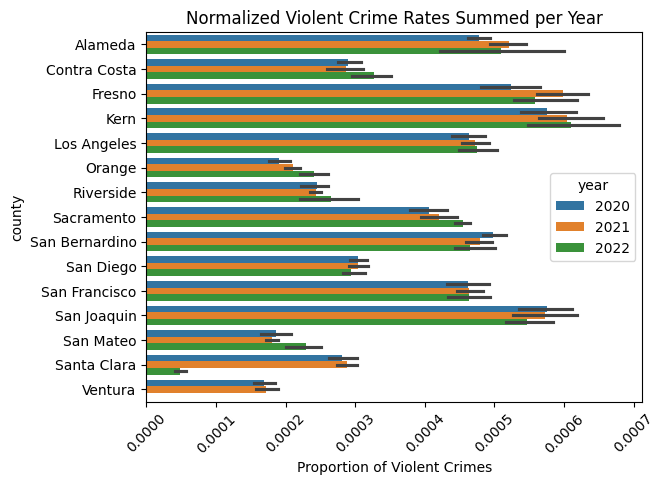

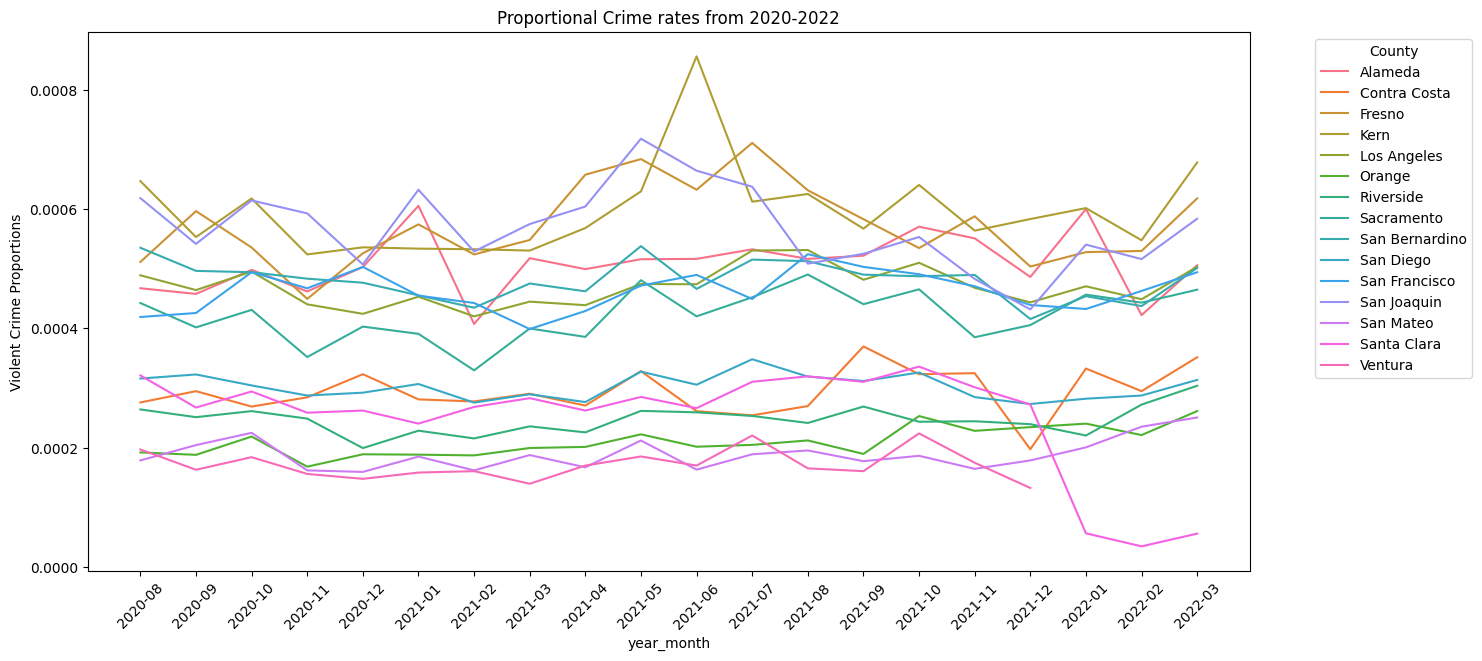

In [17]:
crime_df['year'] = crime_df['year_month'].str.split('-').str[0]
crime_df['violent_crime_proportion'] = crime_df['Violent_sum'] /  data['population']
sns.barplot(y = 'county', x = 'violent_crime_proportion', hue = 'year', data = crime_df)
plt.title('Normalized Violent Crime Rates Summed per Year')
plt.xlabel('Proportion of Violent Crimes')
plt.xticks(rotation = 45)

plt.show()
plt.figure(figsize=(15, 7))
sns.lineplot(x = 'year_month', y = 'violent_crime_proportion', hue = 'county', data = crime_df)
plt.title("Proportional Crime rates from 2020-2022")
plt.ylabel("Violent Crime Proportions")
plt.xticks(rotation = 45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

### Section 2 of EDA - Analysis of COVID-19 Cases Dataset

In [18]:
# Importing necessary packages

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

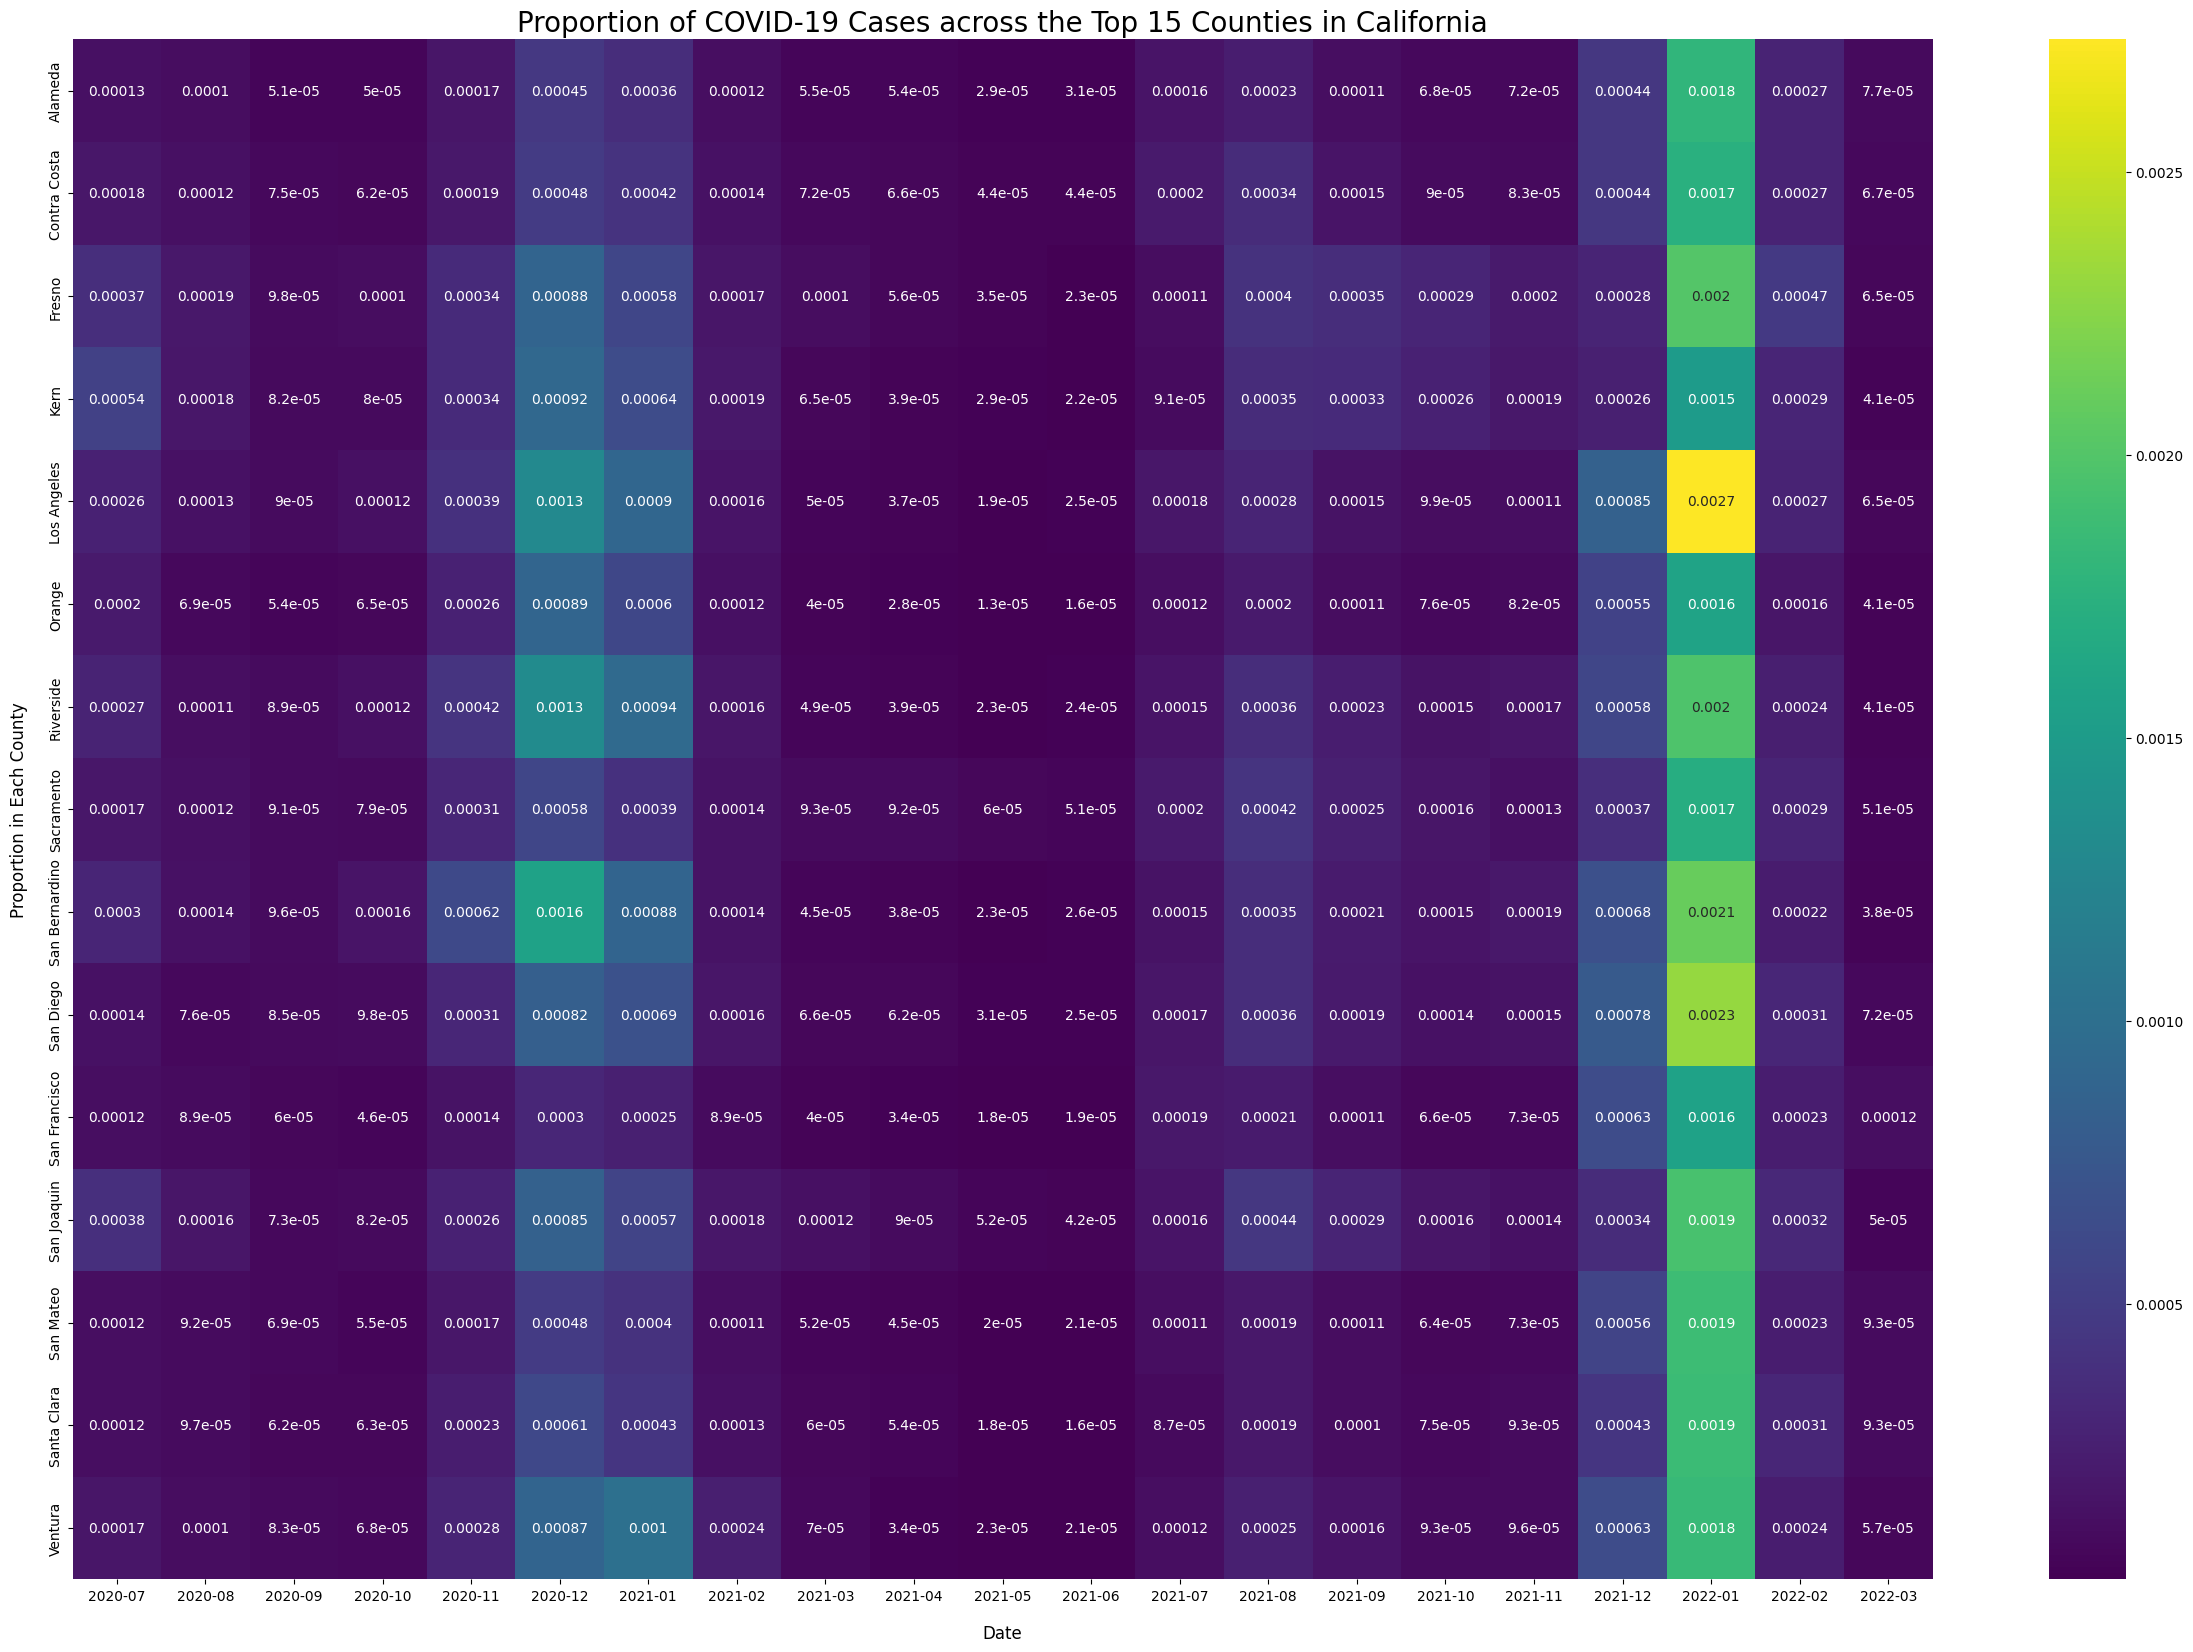

In [25]:
""" 
Generating a heatmap of date/time vs proportion of cumulative COVID-19 cases

most populated counties in california (source: https://www.california-demographics.com/counties_by_population)
# 1	Los Angeles County	9,936,690
# 2	San Diego County	3,289,701
# 3	Orange County	3,175,227
# 4	Riverside County	2,429,487
# 5	San Bernardino County	2,180,563 
"""


plt.figure(figsize=(30, 20))

# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = monthly_average_prop.pivot(index='area', columns='year_month', values='proportion of cases')

sns.heatmap(data=heatmap_data, cmap='viridis', annot=True)

plt.title('Proportion of COVID-19 Cases across the Top 15 Counties in California', fontsize=20)
plt.xlabel('Date', fontsize = 12, labelpad=15)
plt.ylabel('Proportion in Each County', fontsize = 12, labelpad=15)

plt.show()

The above figure is a heatmap looking at changes in the proportion of cumulative COVID-19 cases in the top 15 most populated counties in California. Proportion was calculated by taking the monthly average cumulative COVID-19 cases of each county divided by the monthly average population of each corresponding county. Based on looking at this heatmap, the counties that had a realtively slower rise in COVID-19 cumulative cases included Alameda, Contra Costa, San Francisco, San Meteo, and Santa Clara. Towards the end (nearing 2022-03), it seems like Los Angeles, San Bernardino, and Riverside counties were the most affected with COVID-19 when just looking at the proportion of cumulative COVID-19 cases.

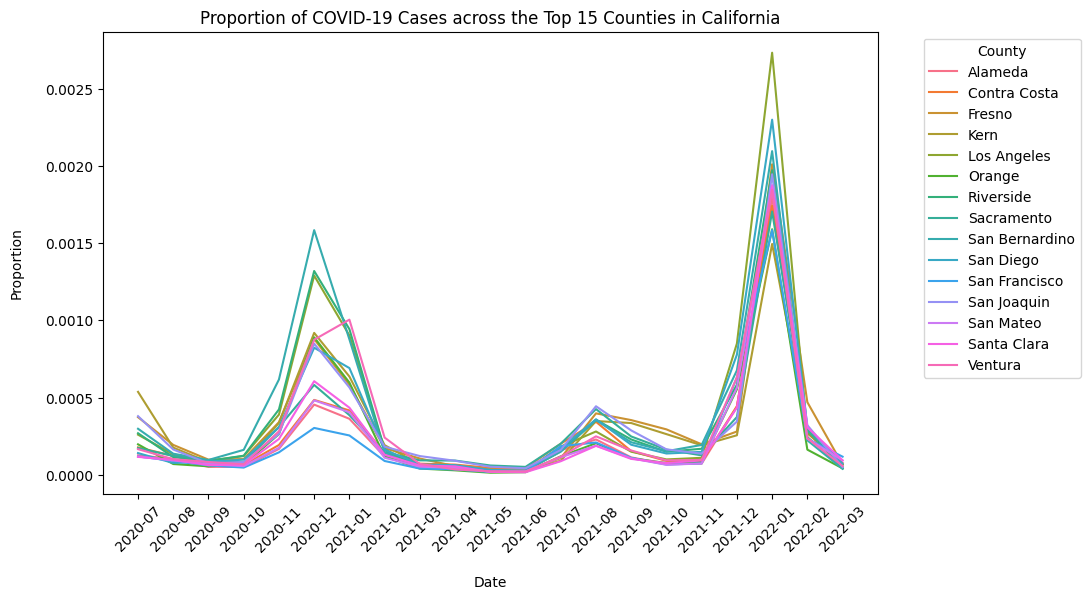

In [23]:
"""
Generating a line plot of date/time vs proportion of cumulative COVID-19 cases
"""

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_average_prop, x='year_month', y='proportion of cases', hue='area')
plt.title('Proportion of COVID-19 Cases across the Top 15 Counties in California')
plt.xlabel('Date', labelpad=15)
plt.ylabel('Proportion', labelpad=15)
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above figure is a line plot looking at changes in the proportion of cumulative COVID-19 cases in the top 15 most populated counties in California. Proportion was calculated by taking the monthly average cumulative COVID-19 cases of each county divided by the monthly average population of each corresponding county. Looking at a line plot gives a better visualization overall trends in rises of cumulative COVID-19 cases across the top 15 counties. All counties seem to exhibit a rather similar trend in their rise in proportion of cumulative COVID-19 cases.

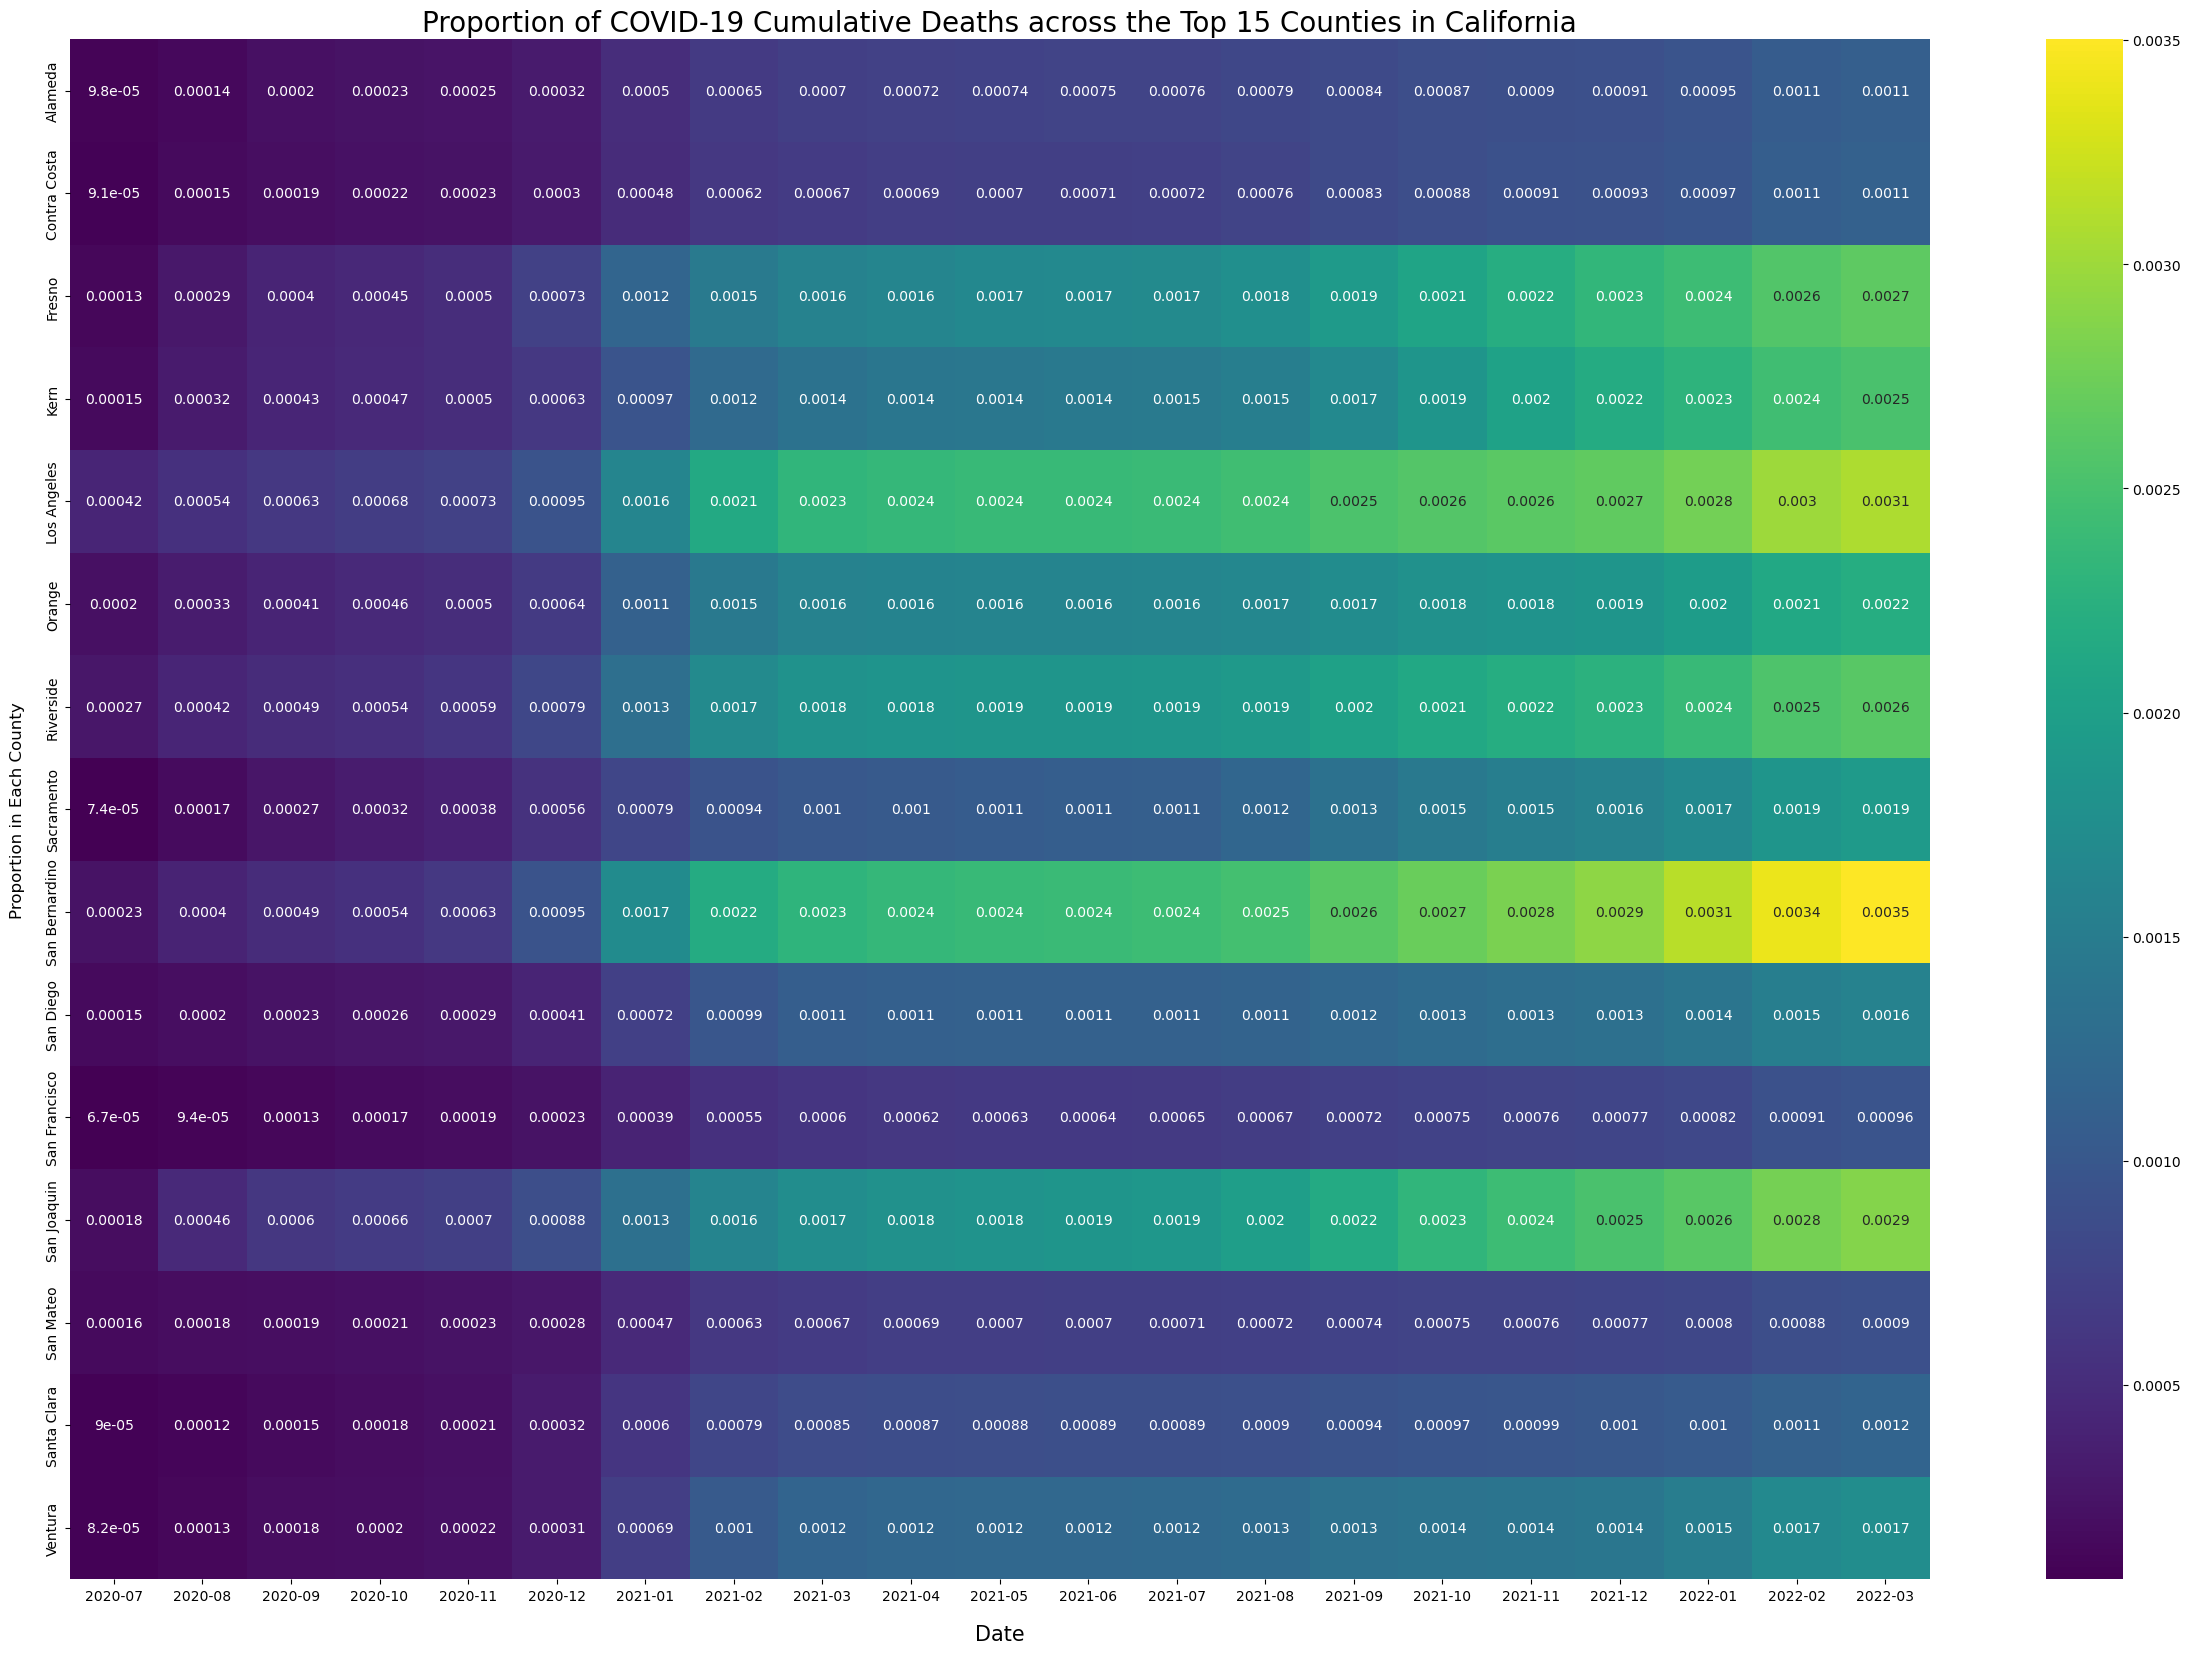

In [ ]:
"""
Generating a heatmap of date/time vs proportion of cumulative COVID-19 deaths
"""

plt.figure(figsize=(30, 20))

# Pivot the DataFrame to create a matrix suitable for a heatmap
heatmap_data = monthly_average_prop.pivot(index='area', columns='year_month', values='proportion of cumulative_deaths')

# Plot the heatmap
sns.heatmap(data=heatmap_data, cmap='viridis', annot=True)  # You can choose a different colormap

plt.title('Proportion of COVID-19 Cumulative Deaths across the Top 15 Counties in California', fontsize=20)
plt.xlabel('Date', fontsize = 15, labelpad=15)
plt.ylabel('Proportion in Each County', fontsize = 12, labelpad=15)

# Show the plot
plt.show()

The above figure is a heatmap looking at changes in the proportion of cumulative COVID-19 deaths in the top 15 most populated counties in California. Proportion was calculated by taking the monthly average cumulative COVID-19 deaths of each county divided by the monthly average population of each corresponding county. Based on looking at this heatmap, the counties that had a realtively slower rise in COVID-19 cumulative cases included Alameda, Contra Costa, San Francisco, San Meteo, and Santa Clara, which are the same as when looking at proportion of cumulative COVID-19 cases. Towards the end (nearing 2022-03), it seems like San Bernardino, Los Angeles, and San Joaquin counties were the most affected with COVID-19 when just looking at the proportion of cumulative COVID-19 deaths.

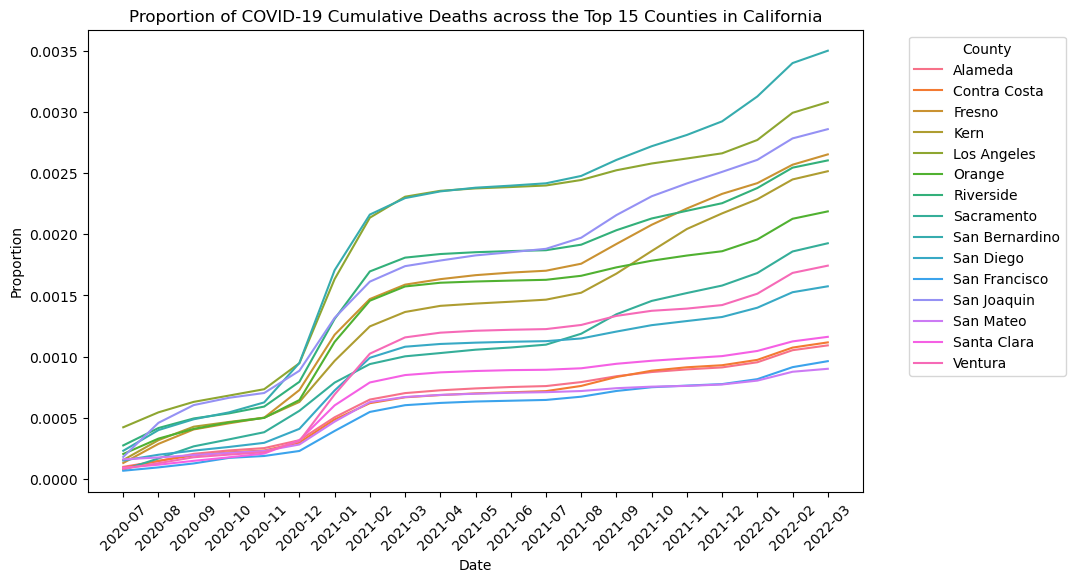

In [ ]:
"""
generating a line plot of date/time vs proportion of cumulative COVID-19 deaths
"""

plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_average_prop, x='year_month', y='proportion of cumulative_deaths', hue='area')
plt.title('Proportion of COVID-19 Cumulative Deaths across the Top 15 Counties in California')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

The above figure is a line plot looking at changes in the proportion of cumulative COVID-19 deaths in the top 15 most populated counties in California. Proportion was calculated by taking the monthly average cumulative COVID-19 deaths of each county divided by the monthly average population of each corresponding county. Looking at a line plot gives a better visualization overall trends in rises of cumulative COVID-19 deaths across the top 15 counties. All counties seem to exhibit a rather similar trend in their rise in proportion of cumulative COVID-19 deaths, just like when looking at proportion of cumulative COVID-19 cases. However, there seems to be more variety or differences between the counties when looking at the proportion of cumulative COVID-19 deaths rather than with cumulative COVID-19 cases 

### Section 3 of EDA - Analysis of COVID-19 Hospitilization Dataset
From the graph below we can see that regardless of the counties, the graph follows a similar trend

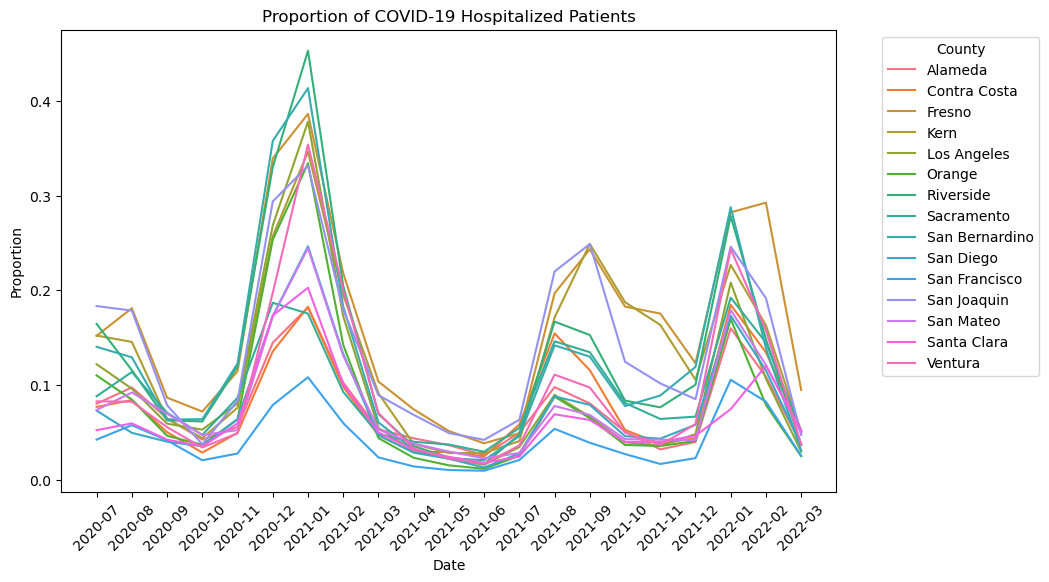

In [ ]:
# Calculate the proportion
hospital_df['proportion'] = hospital_df['hospitalized_covid_patients'] / hospital_df['all_hospital_beds']
hospital_df['proportion'] = hospital_df['proportion'].apply(lambda x: x if x <= 1 else np.nan)
# Plot the proportion
plt.figure(figsize=(10, 6))
sns.lineplot(data=hospital_df, x='year_month', y='proportion', hue='county')
plt.title('Proportion of COVID-19 Hospitalized Patients')
plt.xlabel('Date')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Section 4 of EDA -- Analysis of Covid-19 Vaccination Dataset

Trend is an important feature to analyze in the vaccination dataset, and both the trend of fully vaccination within a specific timespan (monthly in this case) and the overall cumulative vaccination are informative. Even though the population of different counties differ and so the proportion will differ, the proportion analysis will be analyzed later in the merged dataset due to the lack of population in this dataset. Also, the overall trend will provide some insights into the vaccinations in different counties from July 2020 - March 2022. 

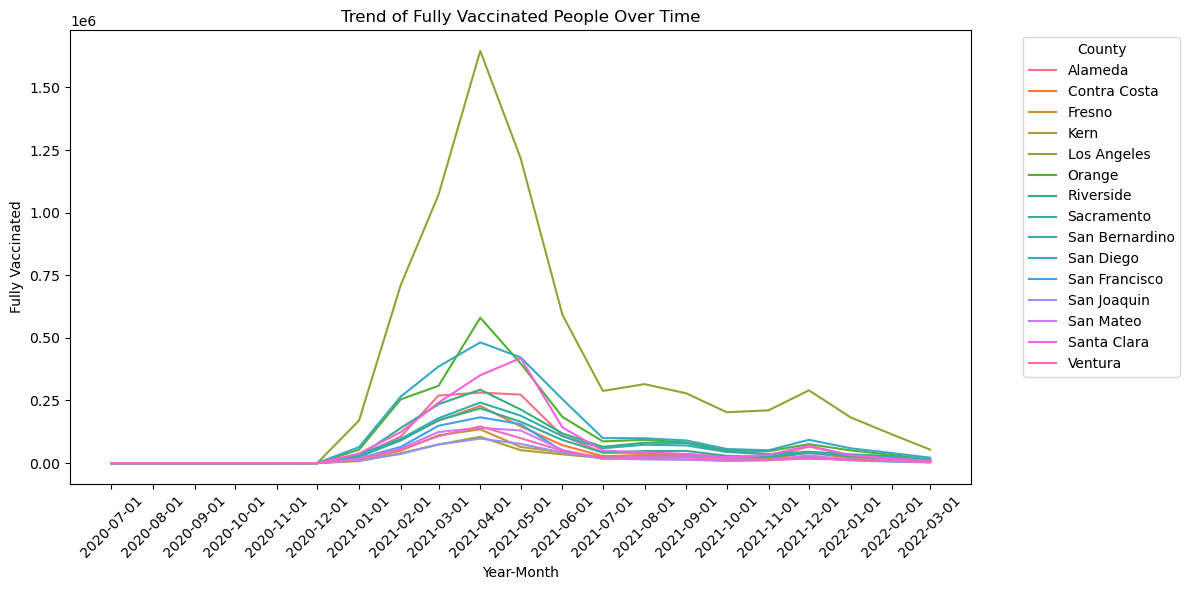

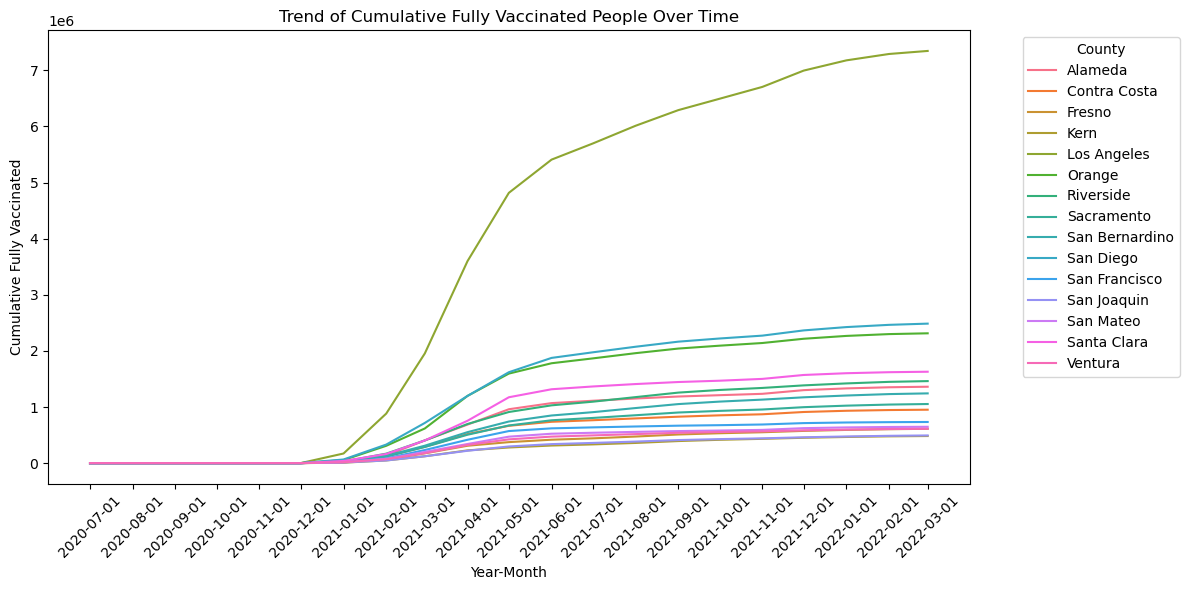

In [ ]:
# convert object to number 
vaccine_df['fully_vaccinated'] = pd.to_numeric(vaccine_df['fully_vaccinated'])
vaccine_df['year'] = pd.to_numeric(vaccine_df['year_month'].str.split('-').str[0])
vaccine_df['month'] = pd.to_numeric(vaccine_df['year_month'].str.split('-').str[1])

# Create line plot to observe the trend
plt.figure(figsize=(12, 6))
vaccine_df['date'] = pd.to_datetime(vaccine_df[['year', 'month']].assign(day=1))
sns.lineplot(x='date', y='fully_vaccinated', hue='county', data=vaccine_df)

plt.title('Trend of Fully Vaccinated People Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Fully Vaccinated')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
# display monthly data 
plt.xticks(pd.date_range(start=vaccine_df['date'].min(), end=vaccine_df['date'].max(), freq='MS'), rotation=45)

plt.tight_layout()
plt.tight_layout()
plt.show()

# plot for cumulative_fully_vaccinated
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='cumulative_fully_vaccinated', hue='county', data=vaccine_df)

plt.title('Trend of Cumulative Fully Vaccinated People Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Cumulative Fully Vaccinated')
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(pd.date_range(start=vaccine_df['date'].min(), end=vaccine_df['date'].max(), freq='MS'), rotation=45)

plt.tight_layout()
plt.show()

The graph at the top is a lineplot representing the trend of fully vaccinated people overtime, which is the number of people who are fully vaccinated in that month. There is a gradual increase/spike starting from Nov. 2020, indicating people were gradually getting vaccination at that time and this increase lasted till March 2021. Then, even though number of fully vaccinated people is still increasing, the rate drops. It will be interesting to look at the correlation with other factors at this time point. The graph at the bottom is also a lineplot that displays the cumulative fully vaccinated people over time. The general trend is increasing, but the slope was the deepest from Nov.2020 to March 2021, conforming with the data seen in the graph above. The slope plateaues after May 2021. The graphs are consistent with people's expectations that there would be more people got full vaccination after a little delay when the COVID-19 started (people needed time to realize the thing & got the time for two doses). We can look at how the increase in vaccination rate correlates with COVD-19 cases and/or the hospitalizaion rate later on. 

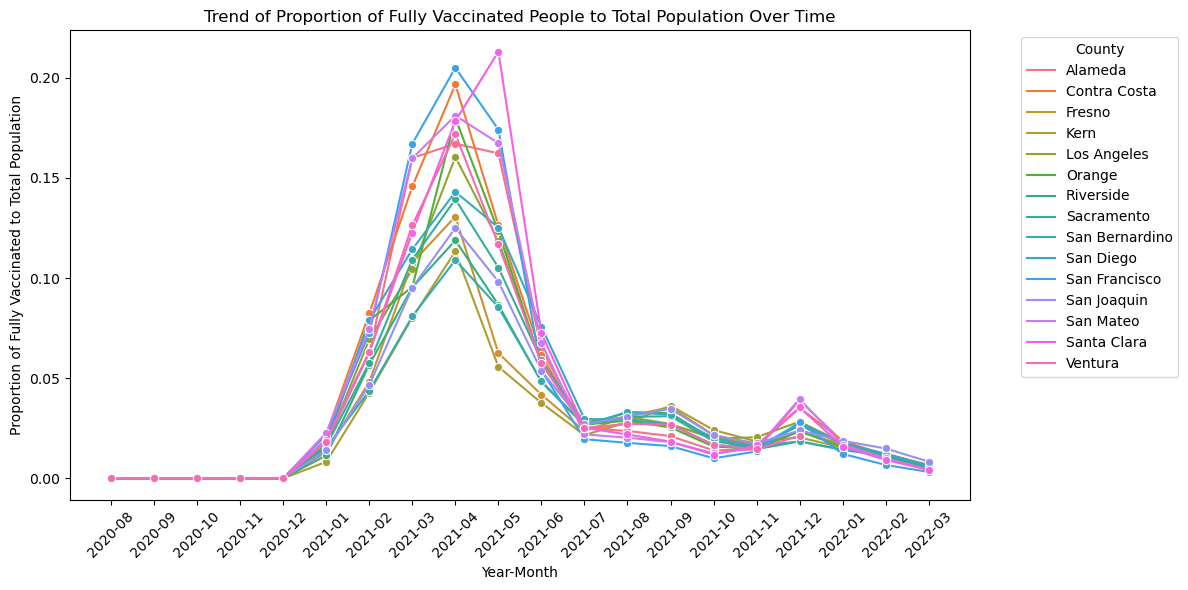

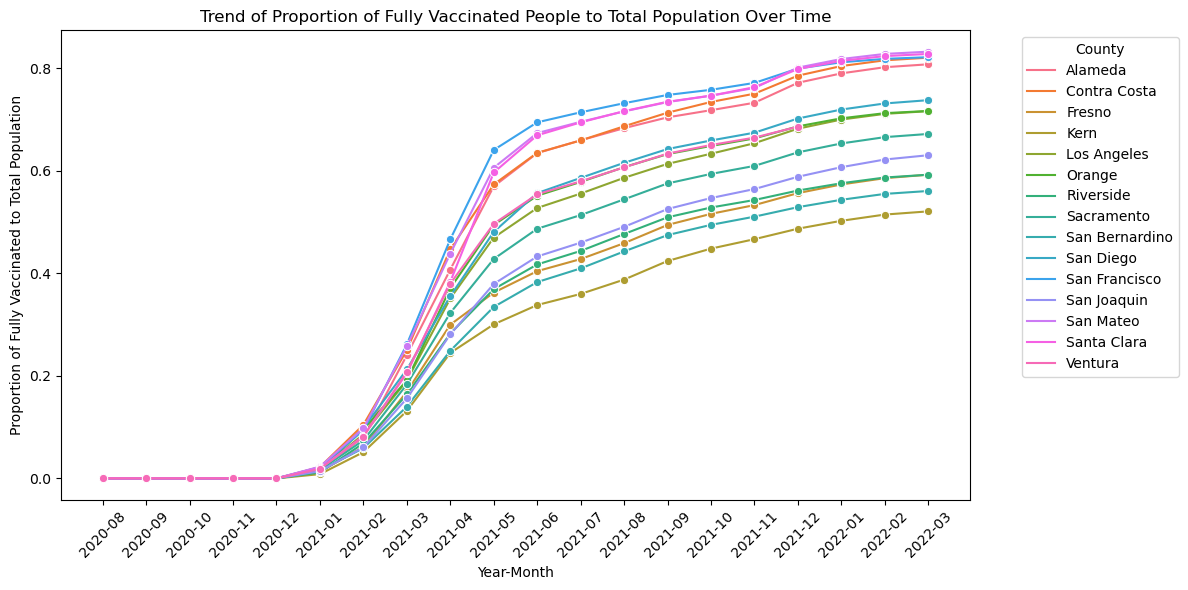

In [ ]:
vaccine_df['proportion_fully_vaccinated'] = vaccine_df['fully_vaccinated'] / data['population']
vaccine_proportion_df = vaccine_df.groupby(['county', 'year_month'])['proportion_fully_vaccinated'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vaccine_proportion_df, x='year_month', y='proportion_fully_vaccinated', hue='county', marker='o')
plt.title('Trend of Proportion of Fully Vaccinated People to Total Population Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion of Fully Vaccinated to Total Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

data['proportion_cumulative_fully_vaccinated'] = vaccine_df['cumulative_fully_vaccinated'] / data['population']
vaccine_cumulative_proportion_df = data.groupby(['county', 'year_month'])['proportion_cumulative_fully_vaccinated'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=vaccine_cumulative_proportion_df, x='year_month', y='proportion_cumulative_fully_vaccinated', hue='county', marker='o')
plt.title('Trend of Proportion of Fully Vaccinated People to Total Population Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Proportion of Fully Vaccinated to Total Population')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This linegraph takes into accrount of the population in different counties and displays the proportion of fully vaccinated people in different counties at different time points and cumulatively. The overall trend doesn't change, but the new insight is that the proportion of fully vaccinated people is similar across all the counties. By graph, there's no huge discrepencies. 

In [21]:
import statsmodels.api as sm
import patsy 

outcome, predictors = patsy.dmatrices("percent_change_covid	~ percent_change_crime ", data = data)

mod = sm.OLS(outcome, predictors)
res_log = mod.fit()
print(res_log.summary())

                             OLS Regression Results                             
Dep. Variable:     percent_change_covid   R-squared:                       0.001
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.3291
Date:                  Tue, 19 Mar 2024   Prob (F-statistic):              0.567
Time:                          20:07:31   Log-Likelihood:                -416.28
No. Observations:                   297   AIC:                             836.6
Df Residuals:                       295   BIC:                             843.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept   

<Axes: xlabel='percent_change_covid', ylabel='percent_change_crime'>

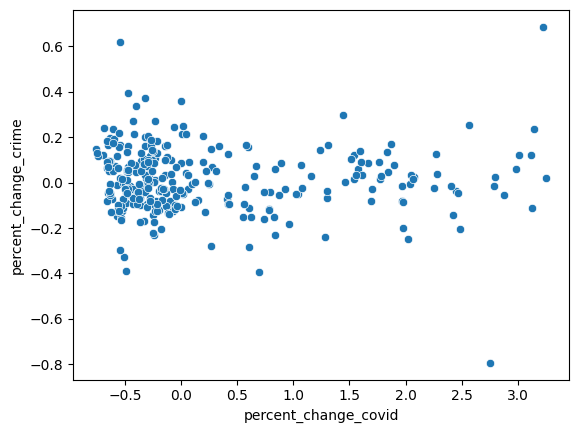

In [22]:
sns.scatterplot(x = "percent_change_covid", y= "percent_change_crime", data= data)

### Machine Learning Analysis:

To get the two variables in the linear regression, we did two things: 

1. Get the percent change for the Violent Sum per month of each county:
- We wanted to do this because each county has a different population, so we wanted to see the trends relative to each county, and how much they changed per month. So, we used the `.pct_change()` function to calculate that. 

2. Get the percent change for the COVID-19 trends per month of each county:
- We had similar reasoning as above to do this for the COVID trends. However, since there were many factors that led into the effect of COVID, we categorized this as the average of the sum of four categories: `cases`,`deaths`, `positive_tests`, `hospitalized_covid_patients`. Then, we got the percent change per month of each county, similar to the crime percent change, and used both of them to calculate upward or downward trends in COVID-19 Cases. 



After putting these into the OLS Regression, we see that we get a p-value of `0.567`. This shows that there doesn't seem to be much of a correlation between COVID trends and crime rates. 

## ETC AD NASEUM

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [ ]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

In regards to potential ethical concerns of this project, there may be various biases depending on the specific dataset used. For crime data, it is likely that datasets are not reflective of all the crimes committed in a specific county but rather only those reported by the police. When conducting our analyses, we need to be aware of this potential collection bias as certain crimes may be underreported or overreported due to factors like law enforcement, community awareness campaigns, recent events, etc. Additionally, we need to consider many potential confounding variables in our analysis; for example, crime rates can vary based on geographical and demographic factors like population density, socioeconomic status, and cultural influences. Any correlations or associations found from our analyses may be due to a range of factors that may not be directly identified through our datasets. Similarly, for COVID-19 data, it is likely that datasets are subject to testing and reporting biases that are influenced by the availability and accessibility to testing resources and healthcare facilities in certain regions and populations. Differences in case definitions, data collection methods, and reporting protocols may create variations in the data cross regions. Confounding variables like asymptomatic cases, pre-existing health conditions, and public health interventions can also skew the measures of the “impact” of COVID-19. Keeping these considerations in mind, we can closely review how data was collected to see if certain groups were potentially overrepresented or underrepresented in the dataset. We can also look for any inconsistencies, missing values, or data entry errors that potentially affect the integrity of the dataset and consider whether this is due to any systematic biases in data collection practices. Statistical techniques can also be used to detect patterns, outliers, and anomalies in the data and help control for confounding variables. Lastly, we can compare and cross-reference multiple datasets from different sources to validate our findings and identify potential biases.

In general, in regards to privacy, no Personal Identifiable Information is being used because the data collected are more generalized by region. We should also keep in consideration that many crime and COVID-19 datasets are collected and maintained by law enforcement agencies or the government and therefore may be subject to terms of use agreements, restricting how data can be accessed or shared. Another general issue with this topic is data transparency as we want to ensure that findings in this research study avoid selective reporting or manipulation of data to fit a particular narrative. To address this, we should work to address any potential blindspots and work to mitigate any dataset bias such as stereotype perpetuation and confirmation bias. Another issue to consider is fairness and equity as a potential concern is that analyzing crime data in correlation with COVID-19 impact may reveal disparities in the distribution of resources, access to healthcare, and exposure to risk factors across marginalized populations. In our analysis, we should consider potential unintended consequences and prevent data from being misinterpreted or used to justify any discriminatory practices or policies.

# Discusison and Conclusion

Unfortunately, from the analysis we did, we didn't have enough evidence to conclude that we can predict the rise or fall of crime rates based on the rise or fall of Covid-19 rates and effects. The p-value for the linear regression between the effect of Covid-19 and the violent crime rates in the 15 counties in California was 0.567, much larger than 0.05. Therefore, we failed to support our hypothesis. 

There are some reasons that might contribute to the failure of the predictive hypothesis. First of all, there are many factors influencing the violent crime rates and there might be some confounding variables in the correlation between Covid-19 and the violent crime rates. For example, the socioeconomic factors might influence both the Covid-19 and the violent crime rates. To be more specific, areas with higher poverty rate or unemployment rate may have a higher probability to commit violent crimes and thus elevate the transmission rates of Covid-19. Due to the fact that we only chose the counties based on the population instead of randomization and we didn't consider other demographic information at all when selecting the targeted datasets, it might be possible that the lack of consideration to those factors contributes to the failure of supporting the hypothesis. Secondly, it might also be possible that the correlation between the Covid-19 and violent crime rates is intrinsically weak. It might be intuitive that we may find some correlations between those two factors, but sometimes intuition can be wrong and not scientific. It could be possible that changes in temporal patterns, such as the long-term trends in crime rates, coincide with the fluctuations in Covid-19 rates, as our dataset only covered two years of the data. Therefore, it can be either due to the quality/length of our dataset, or just the coincidence nature between the two factors. 

Despite the frustrating results, future studies might still want to investigate the factors contributing to the surged crime rates across the States and the discrepant findings of the violent crime rates in California. Future studies could explore additional variables, employ more data analysis techniques (due to our limited knowledge about machine learning model, we might not choose the most appropriate one), and extend the timeframe of data collection to gain a better understanding of the complex dynamics between COVID-19 and crime rates. Additionally, incorporating demographic information and socioeconomic indicators into the analysis could help disentangle the intertwined relationship between COVID-19 and violent crime.


# Team Contributions

Speficy who did what.  This should be pretty granular, perhaps bullet points, no more than a few sentences per person.
- Lilian Xia: initial backgroud & prior work, found some datasets, cleaned & analyzed vaccination dataset and the merged covid-19 dataset, made the slides for video presentataion, and the discussion and conclusion. 